# Antal rum

In [47]:
import os
import glob

import numpy as np
import pandas as pd

%matplotlib inline

In [48]:
from helpers import *

# Data prep

In [49]:
df = pd.read_csv('../indata/supermappen/Tabell4B_Ekbistkonbas17Ny.csv', encoding='latin1' , sep=';', decimal=',')

In [50]:
df = df.rename(columns={
    'basomrade': 'BASKOD2010',
    'man': 'male',
    'kvinna': 'female',
    'tot': 'total'
})

In [51]:
df['year'] = 2017

In [52]:
df = df[['BASKOD2010', 'year', 'male', 'female', 'total']]

In [53]:
df = baskod2010tobasomrade(df, n_numeric=3)#.drop(columns=['BASKOD2010', 'BASKOD2000'])

In [54]:
df[df['basomrade'] == "5630510_norra_varmdo_torsby_evlinge_saltaro_skarmaro"]

year                                          basomrade  male  female  \
855  2017  5630510_norra_varmdo_torsby_evlinge_saltaro_sk...    20      30   

     total  
855     50

In [55]:
male = df[['basomrade', 'male']].rename(columns={'male':'value'})
male['Kön'] = 'male'
female = df[['basomrade', 'female']].rename(columns={'female':'value'})
female['Kön'] = 'female'

df = pd.concat([male, female], sort=False)
df['year'] = '2017'

df['Kön'] = df['Kön'].astype('category')

In [56]:
df.head()

basomrade  value   Kön  year
0     1010120_skeppsbron      0  male  2017
1       1010130_munkbron      0  male  2017
2     1010140_stortorget      0  male  2017
3    1010220_klara_kyrka      0  male  2017
4  1010230_centralposten      0  male  2017

# Antal med ekonomiskt bistånd

In [57]:
concept = 'ekbist_18_64_tot'

In [58]:
total = df.groupby(['basomrade', 'year']).sum().reset_index()

In [59]:
output = appendNewDatapoints(concept, total, new=True)

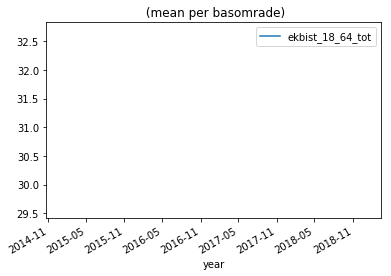

In [60]:
plotcombined(output, concept)

In [61]:
male, female = byGender(concept, df, new=True)

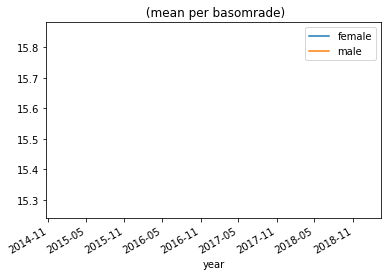

In [62]:
plotcombined(female, 'female')
plotcombined(male, 'male')